In [795]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

from ipywidgets import interact

In [1088]:
N = 100
F_max = 1.0
sigma = N * 0.01
bin_size = 4
width = ((sigma * 3.0) * bin_size) / N # https://en.wikipedia.org/wiki/68–95–99.7_rule
scale = (1.0 - (width * 2.0))

def f(v): # [0, 1]
    v = v * scale
    v = v + width
    x = round(v * N)
    return x # [0, N]

def f_inv(x): # [0, N]
    v = x / N
    v = v - width
    v = v / scale
    return v # [0, 1]

def bin(x):
    return round(x / bin_size)

def fill(p, v):
    for i in range(0, N):
        d = bin(i - f(v))
        r = F_max * math.exp(-1.0 * ((d**2) / (2.0 * (sigma**2))))
        p[i] = r    

def vote(population):
    num = 0.0
    for i in range(0, N):
        num += f_inv(i) * population[i]
    den = 0.0
    for i in range(0, N):
        den += population[i]
    return num / den

In [1089]:
bin_size = 4

for v in np.arange(0.0, 1.1, 0.1):
    population = np.zeros(N)

    fill(population, v)
    voted = vote(population)

    expected = f_inv(f(v))
    err = abs(expected - voted)
    print("val", v, "vote", voted, "expect", expected, "err", err)

val 0.0 vote 0.000224513370764 expect 0.0 err 0.000224513370764
val 0.1 vote 0.10526326262 expect 0.105263157895 err 1.04725373512e-07
val 0.2 vote 0.197368421054 expect 0.197368421053 err 1.70932712429e-12
val 0.3 vote 0.302631578947 expect 0.302631578947 err 2.22044604925e-16
val 0.4 vote 0.394736842105 expect 0.394736842105 err 2.22044604925e-16
val 0.5 vote 0.5 expect 0.5 err 2.22044604925e-16
val 0.6 vote 0.605263157895 expect 0.605263157895 err 2.22044604925e-16
val 0.7 vote 0.697368421053 expect 0.697368421053 err 2.22044604925e-16
val 0.8 vote 0.802631578945 expect 0.802631578947 err 2.51731968604e-12
val 0.9 vote 0.89473663992 expect 0.894736842105 err 2.02185518328e-07
val 1.0 vote 0.999600508498 expect 1.0 err 0.000399491502079


In [1090]:
print([f(v) for v in np.arange(0.0, 1.1, 0.1)])
print([f_inv(f(v)) for v in np.arange(0.0, 1.1, 0.1)])

[12.0, 20.0, 27.0, 35.0, 42.0, 50.0, 58.0, 65.0, 73.0, 80.0, 88.0]
[0.0, 0.10526315789473686, 0.19736842105263161, 0.30263157894736842, 0.39473684210526316, 0.5, 0.60526315789473684, 0.69736842105263164, 0.80263157894736836, 0.89473684210526316, 1.0]


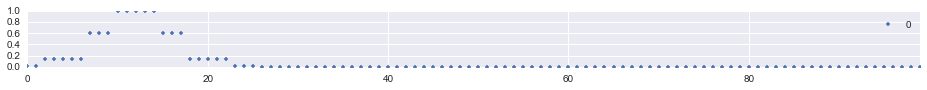

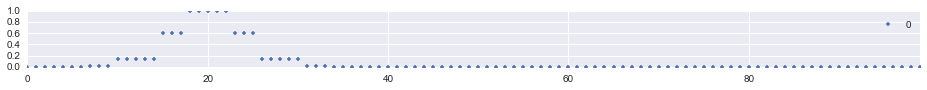

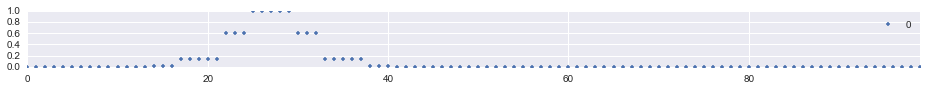

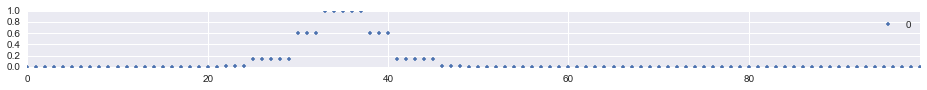

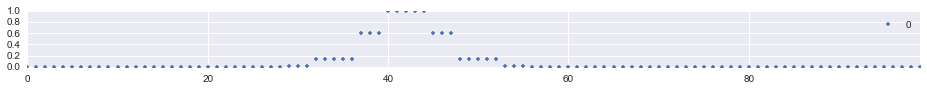

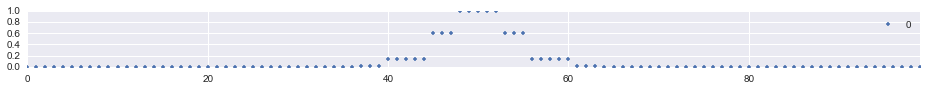

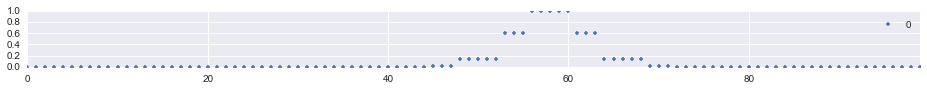

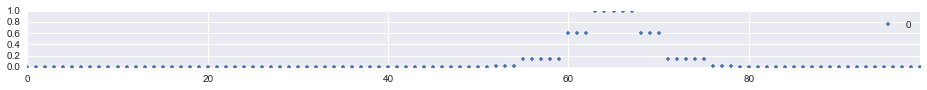

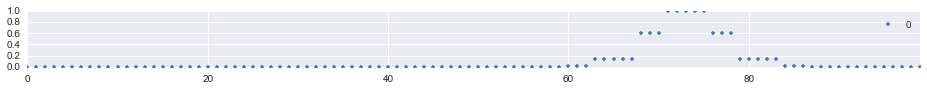

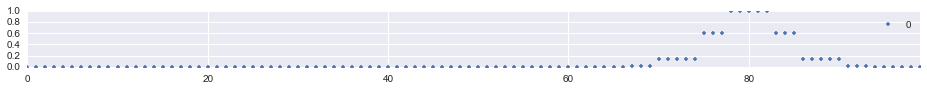

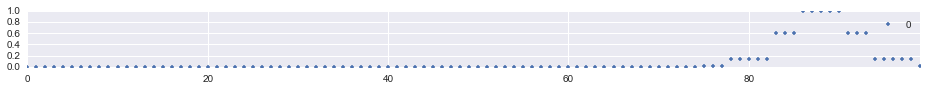

In [1092]:
for v in np.arange(0.0, 1.1, 0.1):
    population = np.zeros(N)
    fill(population, v)
    df = pd.DataFrame(population)
    df.plot(style=".", figsize=(16, 1))